# Sommaire :

<a href="#A1">**Partie 1 : Présentation de la base**</a>

<a href="#A2">**Partie 2 : Nettoyage**</a>

<a href="A3">**Part 3 : Preprocessing**</a>

<a href="A4">**Part 4 : T-SNE et clustering**</a>

## <a name="A1">**Partie 1 : Présentation de la base**</a>

In [1]:
#Général
import numpy as np
import pandas as pd
import os
import ast
import datetime
import time

#Traitement du texte
import nltk
nltk.download('averaged_perceptron_tagger')
import re
from sklearn.preprocessing import LabelEncoder

#Feature extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#Classification
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from nltk.classify import NaiveBayesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import roc_auc_score, auc 
from nltk.classify import accuracy

#model selection
from sklearn.model_selection import GridSearchCV, train_test_split

#Visualisation
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
import folium
import folium.plugins
from matplotlib import pyplot as plt
import plotly.graph_objs as go
import missingno as msno

#Encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# Import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import pickle
import time
from sklearn import cluster, metrics
from sklearn import manifold, decomposition
import logging

logging.disable(logging.WARNING) # disable WARNING, INFO and DEBUG logging everywhere


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\John\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
# Descriptions produits
df = pd.read_csv(r"C:\Users\John\Desktop\Formation\6-Classifiez automatiquement des biens de consommation\1-Projet_6\flipkart_com-ecommerce_sample_1050.csv")

In [3]:
# Images
im = r"C:\Users\John\Desktop\Formation\6-Classifiez automatiquement des biens de consommation\1-Projet_6\Images"

In [4]:
df.sample(5)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
121,7dd5e83e2108a97659577e50879f9d9f,2016-03-25 17:27:56 +0000,http://www.flipkart.com/toffyhouse-baby-boy-s-...,Toffyhouse Baby Boy's Sleepsuit,"[""Baby Care >> Infant Wear >> Baby Boys' Cloth...",BOLEDTCXKEZP9MVG,545.0,545.0,7dd5e83e2108a97659577e50879f9d9f.jpg,False,Specifications of Toffyhouse Baby Boy's Sleeps...,No rating available,No rating available,Toffyhouse,"{""product_specification""=>[{""key""=>""Sleeve"", ""..."
684,8396537a124f502d11ab99972c816129,2015-12-31 09:19:31 +0000,http://www.flipkart.com/oshea-herbals-uvshield...,Oshea Herbals UVSHIELD - Sunscreen Gel - SPF 2...,"[""Beauty and Personal Care >> Body and Skin Ca...",SNREYGHC2HC9FGMB,195.0,180.0,8396537a124f502d11ab99972c816129.jpg,False,Flipkart.com: Buy Oshea Herbals UVSHIELD - Sun...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Quantity"",..."
190,b46d7b8e6826ad4c8b40a991da0f54d7,2015-12-01 12:40:44 +0000,http://www.flipkart.com/rockmantra-vintage-sea...,Rockmantra Vintage Sea Evening Ceramic Mug,"[""Kitchen & Dining >> Coffee Mugs >> Rockmantr...",MUGEAGGKKZ7ADH6X,499.0,199.0,b46d7b8e6826ad4c8b40a991da0f54d7.jpg,False,Buy Rockmantra Vintage Sea Evening Ceramic Mug...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Type"", ""va..."
833,6e7cc21610991cab64595af678e8eb5a,2015-12-29 05:07:38 +0000,http://www.flipkart.com/tapawire-portable-usb-...,Tapawire Portable USB Flexible Stick Dimmable ...,"[""Computers >> Laptop Accessories >> USB Gadge...",USGEDRPHJHRGHJNH,699.0,449.0,6e7cc21610991cab64595af678e8eb5a.jpg,False,Buy Tapawire Portable USB Flexible Stick Dimma...,No rating available,No rating available,Tapawire,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
132,614dbfa2f42c4684c0bb6152091113a6,2015-12-01 12:40:44 +0000,http://www.flipkart.com/prithish-independence-...,Prithish Independence Day Design 7 Ceramic Mug,"[""Kitchen & Dining >> Coffee Mugs >> Prithish ...",MUGE9P6DJGVZHRMV,599.0,225.0,614dbfa2f42c4684c0bb6152091113a6.jpg,False,Buy Prithish Independence Day Design 7 Ceramic...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Type"", ""va..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [6]:
print('nb d\'images : ',len(os.listdir(im)))

nb d'images :  1050


## <a name="A2">**Partie 2 : Cleaning**</a>

## Suppression des colonnes et lignes vides

In [7]:
df.drop(columns = 'brand', inplace = True)
df.dropna(axis = 'rows', how = 'any', inplace = True)
df.reset_index(inplace=True, drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1048 non-null   object 
 1   crawl_timestamp          1048 non-null   object 
 2   product_url              1048 non-null   object 
 3   product_name             1048 non-null   object 
 4   product_category_tree    1048 non-null   object 
 5   pid                      1048 non-null   object 
 6   retail_price             1048 non-null   float64
 7   discounted_price         1048 non-null   float64
 8   image                    1048 non-null   object 
 9   is_FK_Advantage_product  1048 non-null   bool   
 10  description              1048 non-null   object 
 11  product_rating           1048 non-null   object 
 12  overall_rating           1048 non-null   object 
 13  product_specifications   1048 non-null   object 
dtypes: bool(1), float64(2), 

## <a name="A3">**Part 3 : Preprocessing**</a>

### 'class_' column added

In [8]:
regexp_cat = '\[\"(?P<cat_1>[\w\s&,\']+)>>(?P<cat_2>[\w\s&,\']+)>*(?P<cat_3>[\w\s&,\']*).*'

In [9]:
def get_cat(text, regexp, name):

    """ Test a regexp on a text, if here is a mach return the stripped specified named group."""

    match = re.match(regexp, text)
    if match is None:
        pass
    else:
        return match.group(name).strip()

In [10]:
# on crée une colonne class
df["class_"] = df["product_category_tree"].apply(lambda x: get_cat(x, regexp_cat, 'cat_1'))

In [11]:
# les classes
df['class_'].unique()

array(['Home Furnishing', 'Baby Care', 'Watches',
       'Home Decor & Festive Needs', 'Kitchen & Dining',
       'Beauty and Personal Care', 'Computers'], dtype=object)

### Text Cleaning and tokenizing

In [12]:
# Lower case
df["cleaned"] = df['description'].apply(lambda x: x.lower())
df[['description','cleaned']].head()

,description,cleaned
0,Key Features of Elegance Polyester Multicolor ...,key features of elegance polyester multicolor ...
1,Specifications of Sathiyas Cotton Bath Towel (...,specifications of sathiyas cotton bath towel (...
2,Key Features of SANTOSH ROYAL FASHION Cotton P...,key features of santosh royal fashion cotton p...
3,Key Features of Jaipur Print Cotton Floral Kin...,key features of jaipur print cotton floral kin...
4,Maserati Time R8851116001 Analog Watch - For ...,maserati time r8851116001 analog watch - for ...


In [13]:
# Punctuation removal function
def remove_punct(text):
    """
        Remove the punctuation
    """
    return re.sub(r'[]!"$%&\'()*+,./:;=#@?[\\^_`{|}~-]+', "", text)
    #return text.translate(str.maketrans('', '', string.punctuation))

In [14]:
# Remove punctuations from the text
df["cleaned"] = df["cleaned"].apply(lambda x: remove_punct(x))
df[['description','cleaned']].head()

,description,cleaned
0,Key Features of Elegance Polyester Multicolor ...,key features of elegance polyester multicolor ...
1,Specifications of Sathiyas Cotton Bath Towel (...,specifications of sathiyas cotton bath towel 3...
2,Key Features of SANTOSH ROYAL FASHION Cotton P...,key features of santosh royal fashion cotton p...
3,Key Features of Jaipur Print Cotton Floral Kin...,key features of jaipur print cotton floral kin...
4,Maserati Time R8851116001 Analog Watch - For ...,maserati time r8851116001 analog watch for b...


In [15]:
# Tokenizing
from nltk.tokenize import word_tokenize

df['tokenized'] = df['cleaned'].apply(word_tokenize)
df[['cleaned','tokenized']].head()

,cleaned,tokenized
0,key features of elegance polyester multicolor ...,"[key, features, of, elegance, polyester, multi..."
1,specifications of sathiyas cotton bath towel 3...,"[specifications, of, sathiyas, cotton, bath, t..."
2,key features of santosh royal fashion cotton p...,"[key, features, of, santosh, royal, fashion, c..."
3,key features of jaipur print cotton floral kin...,"[key, features, of, jaipur, print, cotton, flo..."
4,maserati time r8851116001 analog watch for b...,"[maserati, time, r8851116001, analog, watch, f..."


In [16]:
# Removing stopwords
nltk.download("stopwords")
from nltk.corpus import stopwords

stop = set(stopwords.words('english'))
df['tokenized'] = df['tokenized'].apply(lambda x: [word for word in x if word not in stop])
df[['cleaned','tokenized']].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\John\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,cleaned,tokenized
0,key features of elegance polyester multicolor ...,"[key, features, elegance, polyester, multicolo..."
1,specifications of sathiyas cotton bath towel 3...,"[specifications, sathiyas, cotton, bath, towel..."
2,key features of santosh royal fashion cotton p...,"[key, features, santosh, royal, fashion, cotto..."
3,key features of jaipur print cotton floral kin...,"[key, features, jaipur, print, cotton, floral,..."
4,maserati time r8851116001 analog watch for b...,"[maserati, time, r8851116001, analog, watch, b..."


In [17]:
# Removing non english word
nltk.download('words')
words = set(nltk.corpus.words.words())

stop = set(stopwords.words('english'))
df['tokenized'] = df['tokenized'].apply(lambda x: [word for word in x if word in words])
df[['cleaned','tokenized']].head()

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\John\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


,cleaned,tokenized
0,key features of elegance polyester multicolor ...,"[key, elegance, polyester, multicolor, abstrac..."
1,specifications of sathiyas cotton bath towel 3...,"[cotton, bath, towel, bath, towel, red, yellow..."
2,key features of santosh royal fashion cotton p...,"[key, royal, fashion, cotton, printed, king, s..."
3,key features of jaipur print cotton floral kin...,"[key, print, cotton, floral, king, sized, doub..."
4,maserati time r8851116001 analog watch for b...,"[time, watch, buy, time, watch, great, genuine..."


In [18]:
# Prerequisite for CountVectorizer : aggregate the words into a sentence
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

df['combined'] = df['tokenized'].apply(lambda x : combine_text(x))
df[['tokenized','combined']].head()

,tokenized,combined
0,"[key, elegance, polyester, multicolor, abstrac...",key elegance polyester multicolor abstract eye...
1,"[cotton, bath, towel, bath, towel, red, yellow...",cotton bath towel bath towel red yellow blue b...
2,"[key, royal, fashion, cotton, printed, king, s...",key royal fashion cotton printed king sized do...
3,"[key, print, cotton, floral, king, sized, doub...",key print cotton floral king sized double prin...
4,"[time, watch, buy, time, watch, great, genuine...",time watch buy time watch great genuine day re...


### Text Features Extraction (CountVectorizer and TfidfVectorizer)

In [19]:
# colorisation de la matrice
def color(val):
    
    color = 'mediumaquamarine' if val > 0 else ''
    return 'background-color: %s' % color

In [20]:
%%time
text_list = list(df['combined'])
#count_vectorizer method
count_cv = CountVectorizer()
tf_cv = count_cv.fit_transform(text_list)
tf_feature_names_cv = count_cv.get_feature_names_out()

#tf-idf method
count_tf = TfidfVectorizer()
tf_tf = count_tf.fit_transform(text_list)
tf_feature_names_tf = count_tf.get_feature_names_out()

print('Term Frequency of Document')
cv = pd.DataFrame(tf_cv.toarray(), columns = tf_feature_names_cv) / len(tf_feature_names_cv)
cv.style.set_caption("Term Frequency of Document")
cv.style.applymap(color)
cv.head()

tf = pd.DataFrame(tf_tf.toarray(), columns = tf_feature_names_tf) / len(tf_feature_names_tf)
tf.style.set_caption("Term Frequency of Document")
tf.style.applymap(color)
tf.head()

Term Frequency of Document
CPU times: total: 266 ms
Wall time: 281 ms


,aa,ability,able,abode,abroad,absolute,absorbency,absorbent,absorber,absorbing,...,young,youth,youthful,youve,zero,zinc,zip,zipper,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
df_cv = pd.concat([cv,df['class_']], axis=1)
df_tf = pd.concat([tf,df['class_']], axis=1)

## <a name="A4">**Part 4 : T-SNE et clustering**</a>

In [22]:
# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features, l_cat) :
    time1 = time.time()
    num_labels=len(set(l_cat))
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    
    # #Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_


# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(y_cat_num), loc="best", title="Categorie")#--------------l_cat
    plt.title('Représentation des produits par catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des produits par clusters')
    
    plt.show()
    print("ARI : ", ARI)

## data preprocessed with CountVectorizer

In [23]:
# Définition of X and y
df_ = df_cv
X = df_.drop(columns='class_')
y= df_['class_']
y_cat_num = LabelEncoder().fit_transform(y)

# X and y split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y,
    test_size=0.3,
    random_state=42
                    )

In [24]:
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(X,y)

CountVectorizer : 
-----------------
ARI :  0.371 time :  21.0


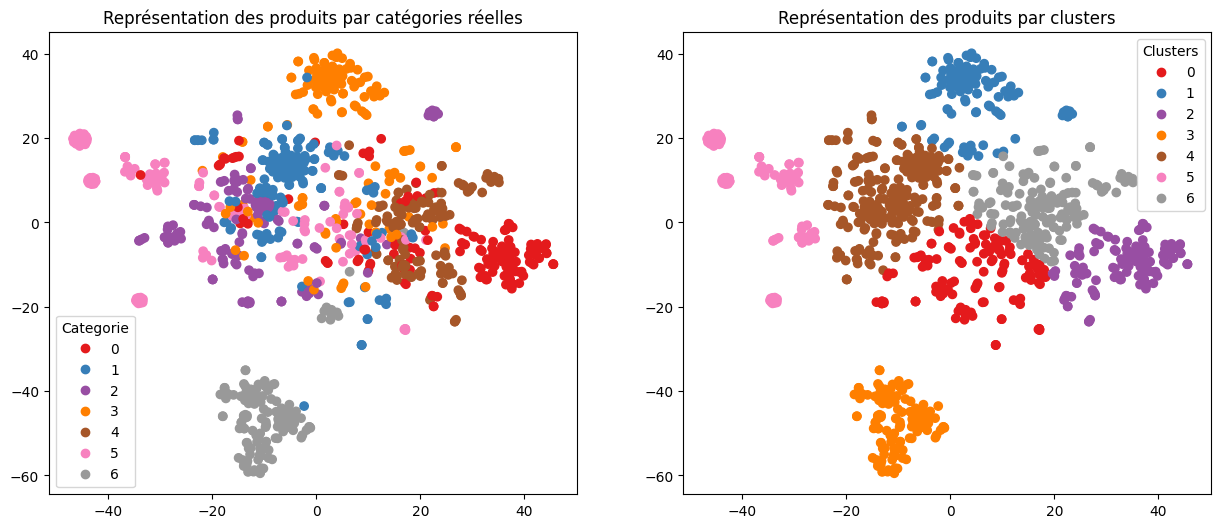

ARI :  0.371


In [25]:
 TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

## data preprocessed with TfidfVectorizer

In [26]:
# Définition of X and y
df_ = df_tf
X = df_.drop(columns='class_')
y= df_['class_']
y_cat_num = LabelEncoder().fit_transform(y)

# X and y split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y,
    test_size=0.3,
    random_state=42
                    )

In [27]:
print("TfidfVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(X,y)

TfidfVectorizer : 
-----------------
ARI :  0.4171 time :  20.0


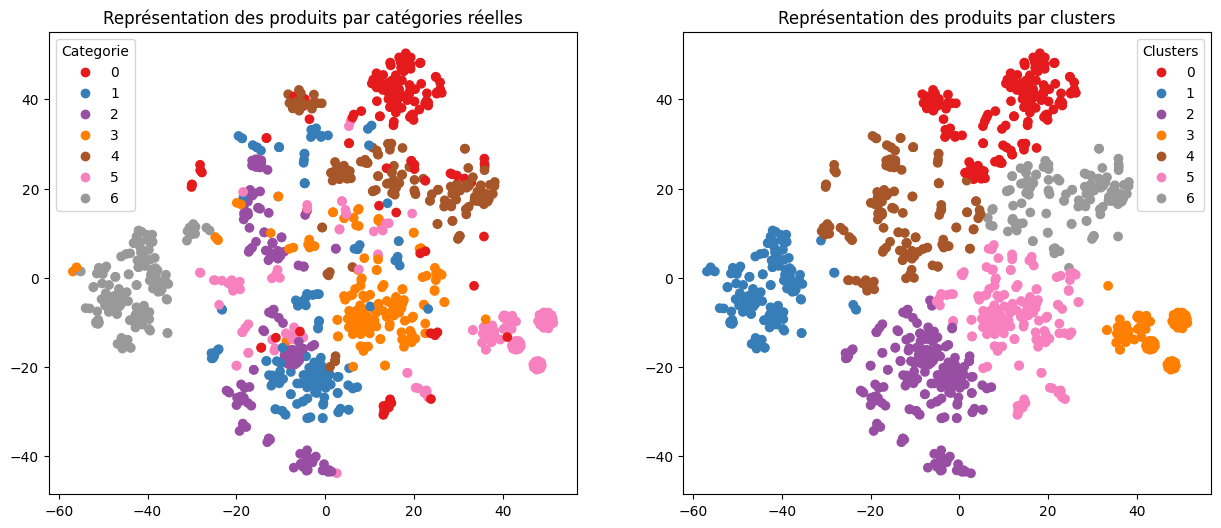

ARI :  0.4171


In [28]:
 TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)